# End-to-End Machine Learning Project
### Working with Real Data

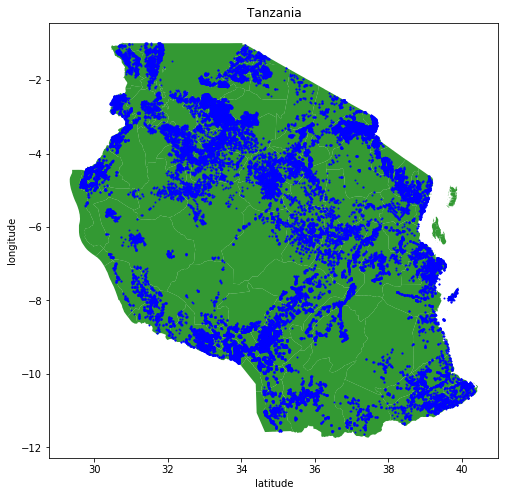

#### Project life-cycle
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Present your solution.

## 1. Look at the big picture.

### Frame the Problem
1. The first question to ask is what exactly is the objective.
**Predict if a water pump is: functional, needs repair, non functional**
2. How does the company expect to use and benefit from this model?
**Plan the maintenance, reduce the time to organize.**
3. The next question to ask is what the current solution looks like (if any). It will often give you a reference performance, as well as insights on how to solve the problem.
4. First, you need to frame the problem: is it supervised or unsupervised? Is it a classification task, a regression task, or something else? **Supervised learning, Classification task**

## 2. Get the data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [2]:
train = pd.read_csv("Demo/training_set_values.csv")
train_labels = pd.read_csv("Demo/training_set_labels.csv")
data = train.merge(train_labels, on='id')

In [3]:
workshop_columns = ['date_recorded','construction_year',
                'gps_height','longitude', 'latitude',
                'basin','region','district_code',
                'population','extraction_type_class',
                'management_group','quality_group',
                'quantity','source_type', 'waterpoint_type',
               'scheme_name','recorded_by','payment_type', 'payment', 'status_group']

## 3. Discover and Visualize the Data to Gain Insights

In [4]:
data = data[workshop_columns]

In [5]:
data.shape

(59400, 20)

In [6]:
data.head()

,date_recorded,construction_year,gps_height,longitude,latitude,basin,region,district_code,population,extraction_type_class,management_group,quality_group,quantity,source_type,waterpoint_type,scheme_name,recorded_by,payment_type,payment,status_group
0,2011-03-14,1999,1390,34.938093,-9.856322,Lake Nyasa,Iringa,5,109,gravity,user-group,good,enough,spring,communal standpipe,Roman,GeoData Consultants Ltd,annually,pay annually,functional
1,2013-03-06,2010,1399,34.698766,-2.147466,Lake Victoria,Mara,2,280,gravity,user-group,good,insufficient,rainwater harvesting,communal standpipe,NaN,GeoData Consultants Ltd,never pay,never pay,functional
2,2013-02-25,2009,686,37.460664,-3.821329,Pangani,Manyara,4,250,gravity,user-group,good,enough,dam,communal standpipe multiple,Nyumba ya mungu pipe scheme,GeoData Consultants Ltd,per bucket,pay per bucket,functional
3,2013-01-28,1986,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,58,submersible,user-group,good,dry,borehole,communal standpipe multiple,NaN,GeoData Consultants Ltd,never pay,never pay,non functional
4,2011-07-13,0,0,31.130847,-1.825359,Lake Victoria,Kagera,1,0,gravity,other,good,seasonal,rainwater harvesting,communal standpipe,NaN,GeoData Consultants Ltd,never pay,never pay,functional


In [7]:
data["status_group"].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [8]:
data.describe()

,construction_year,gps_height,longitude,latitude,district_code,population
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000
mean,1300.652475,668.297239,34.077427,-5.706033e+00,5.629747,179.909983
std,951.620547,693.116350,6.567432,2.946019e+00,9.633649,471.482176
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,2.000000,0.000000
50%,1986.000000,369.000000,34.908743,-5.021597e+00,3.000000,25.000000
75%,2004.000000,1319.250000,37.178387,-3.326156e+00,5.000000,215.000000
max,2013.000000,2770.000000,40.345193,-2.000000e-08,80.000000,30500.000000


In [9]:
data.isna().sum()

date_recorded                0
construction_year            0
gps_height                   0
longitude                    0
latitude                     0
basin                        0
region                       0
district_code                0
population                   0
extraction_type_class        0
management_group             0
quality_group                0
quantity                     0
source_type                  0
waterpoint_type              0
scheme_name              28166
recorded_by                  0
payment_type                 0
payment                      0
status_group                 0
dtype: int64

In [10]:
for col in data.columns:
    print(col, data[col].nunique())

date_recorded 356
construction_year 55
gps_height 2428
longitude 57516
latitude 57517
basin 9
region 21
district_code 20
population 1049
extraction_type_class 7
management_group 5
quality_group 6
quantity 5
source_type 7
waterpoint_type 7
scheme_name 2696
recorded_by 1
payment_type 7
payment 7
status_group 3


In [11]:
data = data.drop(['scheme_name', 'recorded_by'], axis=1)

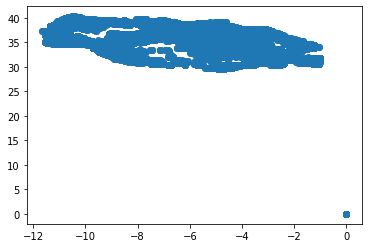

In [12]:
plt.scatter(data['latitude'], data['longitude'])
plt.show()

In [13]:
data[data.longitude == 0].shape

(1812, 18)

In [14]:
# Keep only the rows where longitude is not 0
data = data[data.longitude != 0]

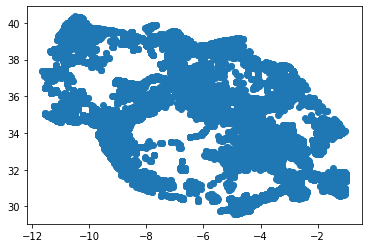

In [15]:
plt.scatter(data['latitude'], data['longitude'])
plt.show()

In [16]:
data.columns

Index(['date_recorded', 'construction_year', 'gps_height', 'longitude',
       'latitude', 'basin', 'region', 'district_code', 'population',
       'extraction_type_class', 'management_group', 'quality_group',
       'quantity', 'source_type', 'waterpoint_type', 'payment_type', 'payment',
       'status_group'],
      dtype='object')

In [17]:
data.head()

,date_recorded,construction_year,gps_height,longitude,latitude,basin,region,district_code,population,extraction_type_class,management_group,quality_group,quantity,source_type,waterpoint_type,payment_type,payment,status_group
0,2011-03-14,1999,1390,34.938093,-9.856322,Lake Nyasa,Iringa,5,109,gravity,user-group,good,enough,spring,communal standpipe,annually,pay annually,functional
1,2013-03-06,2010,1399,34.698766,-2.147466,Lake Victoria,Mara,2,280,gravity,user-group,good,insufficient,rainwater harvesting,communal standpipe,never pay,never pay,functional
2,2013-02-25,2009,686,37.460664,-3.821329,Pangani,Manyara,4,250,gravity,user-group,good,enough,dam,communal standpipe multiple,per bucket,pay per bucket,functional
3,2013-01-28,1986,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,58,submersible,user-group,good,dry,borehole,communal standpipe multiple,never pay,never pay,non functional
4,2011-07-13,0,0,31.130847,-1.825359,Lake Victoria,Kagera,1,0,gravity,other,good,seasonal,rainwater harvesting,communal standpipe,never pay,never pay,functional


In [18]:
data.date_recorded.value_counts().head()

2011-03-15    572
2011-03-17    558
2013-02-03    545
2011-03-14    520
2011-03-16    513
Name: date_recorded, dtype: int64

In [19]:
data.construction_year.value_counts().head()

0       18897
2010     2645
2008     2613
2009     2533
2000     2091
Name: construction_year, dtype: int64

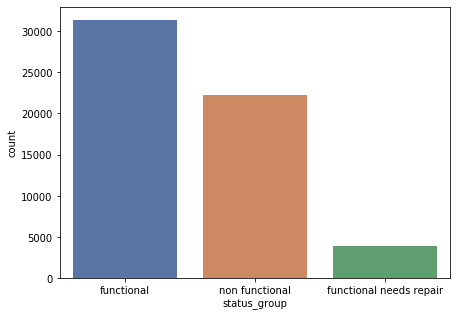

In [20]:
plt.figure(figsize=(7,5)) #first show without
sns.countplot(data.status_group, palette='deep')
plt.show()

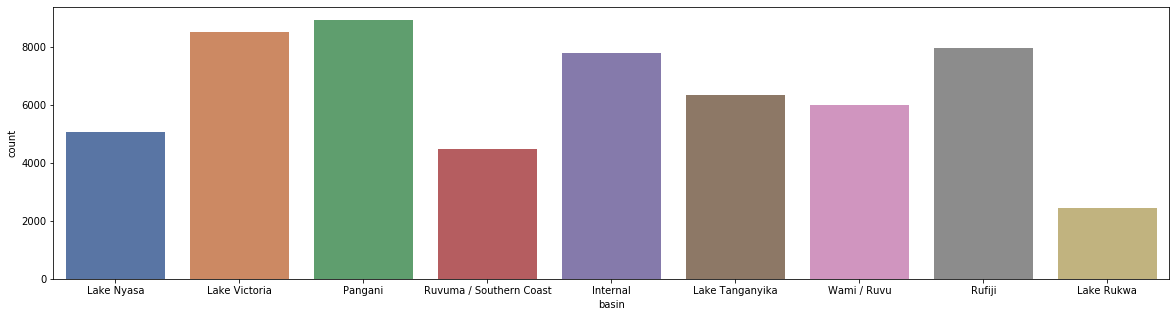

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(data.basin, palette='deep')
plt.show()

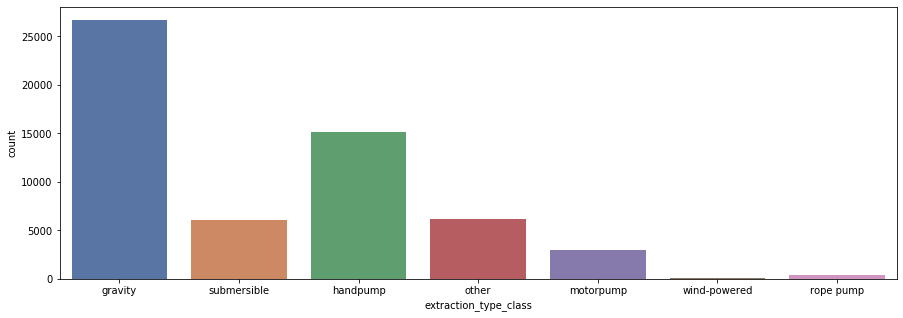

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(data.extraction_type_class, palette = 'deep')
plt.show()

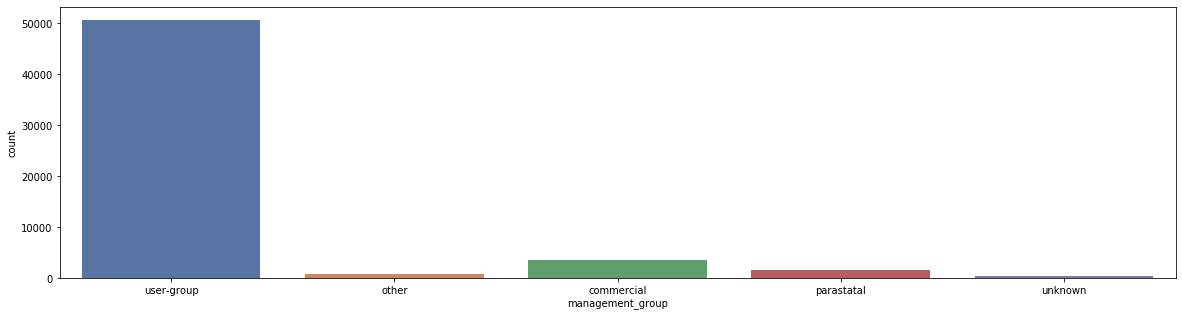

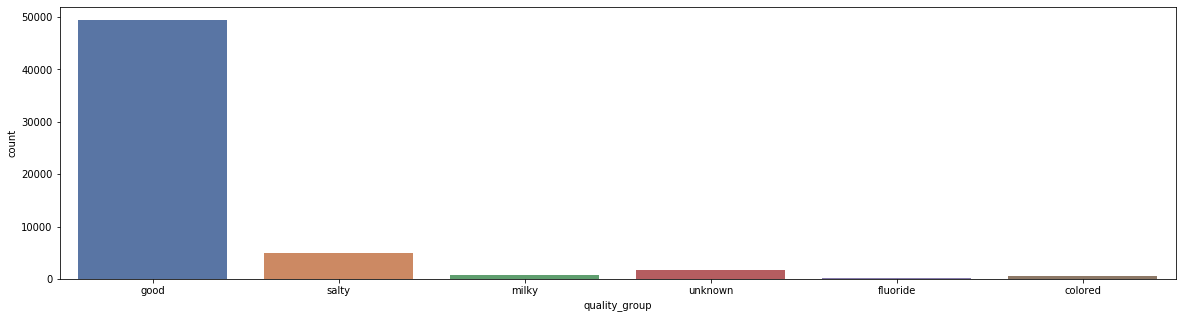

In [23]:
# Not useful
plt.figure(figsize=(20,5))
sns.countplot(data.management_group, palette = 'deep')
plt.show()

plt.figure(figsize=(20,5))
sns.countplot(data.quality_group, palette = 'deep')
plt.show()

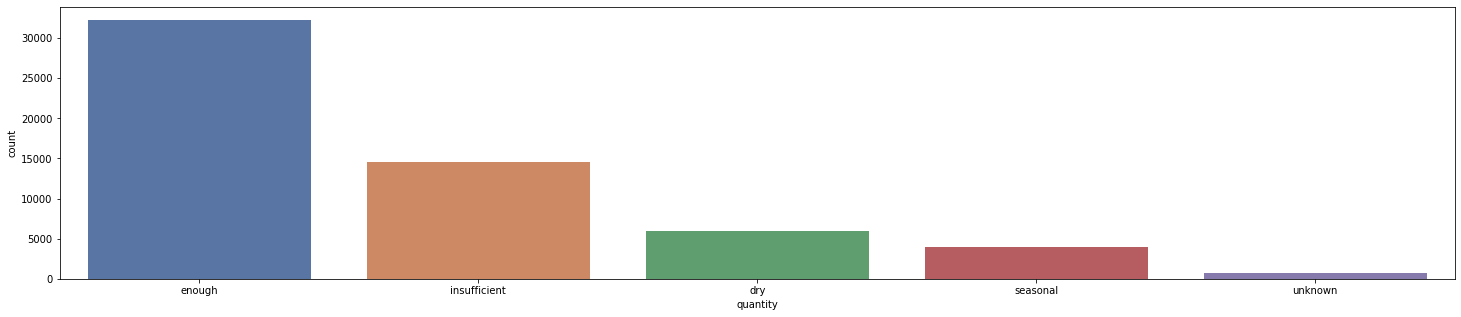

In [24]:
plt.figure(figsize=(25,5))
sns.countplot(data.quantity, palette = 'deep')
plt.show()

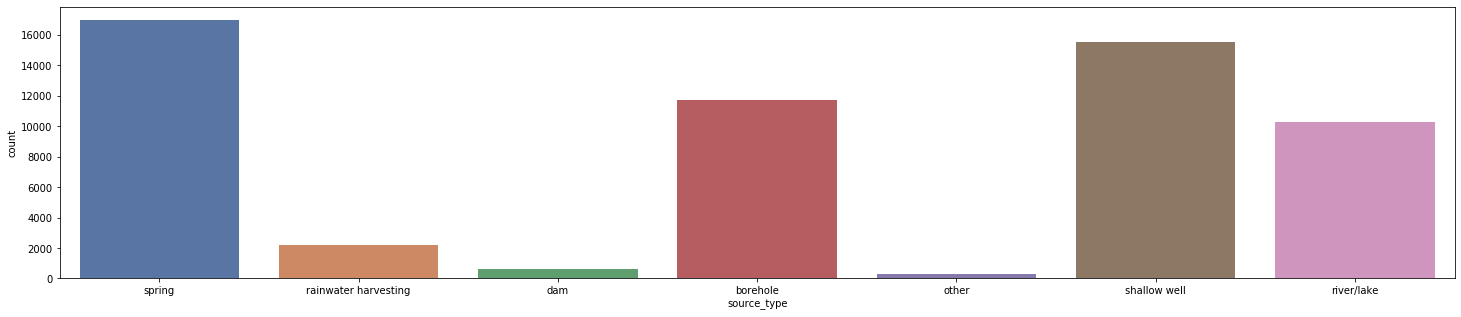

In [25]:
plt.figure(figsize=(25,5))
sns.countplot(data.source_type, palette = 'deep')
plt.show()

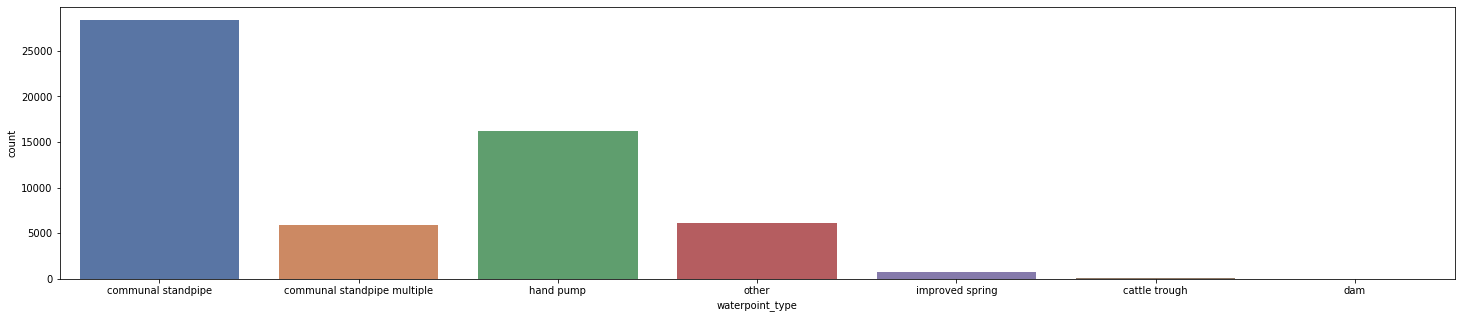

In [26]:
plt.figure(figsize=(25,5))
sns.countplot(data.waterpoint_type, palette = 'deep')
plt.show()

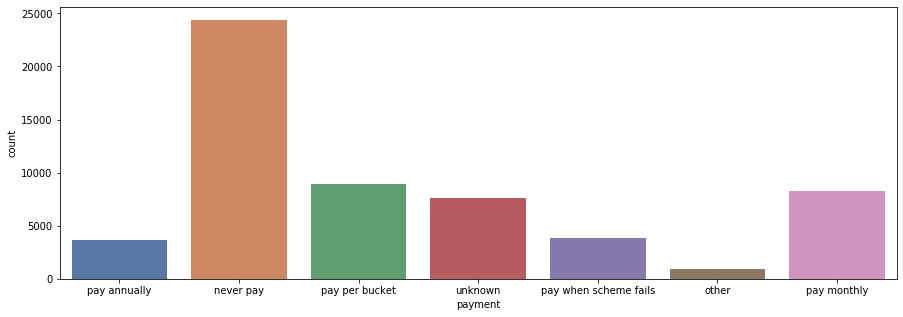

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(data.payment, palette = 'deep')
plt.show()

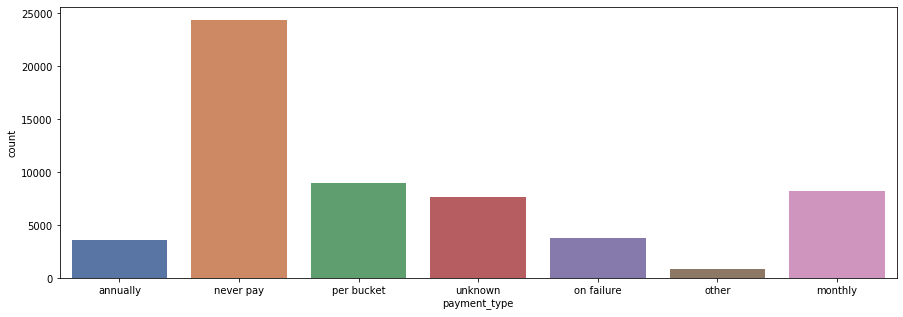

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(data.payment_type, palette = 'deep')
plt.show()

In [29]:
data = data.drop(['management_group', 'quality_group', 'payment_type'], axis=1)

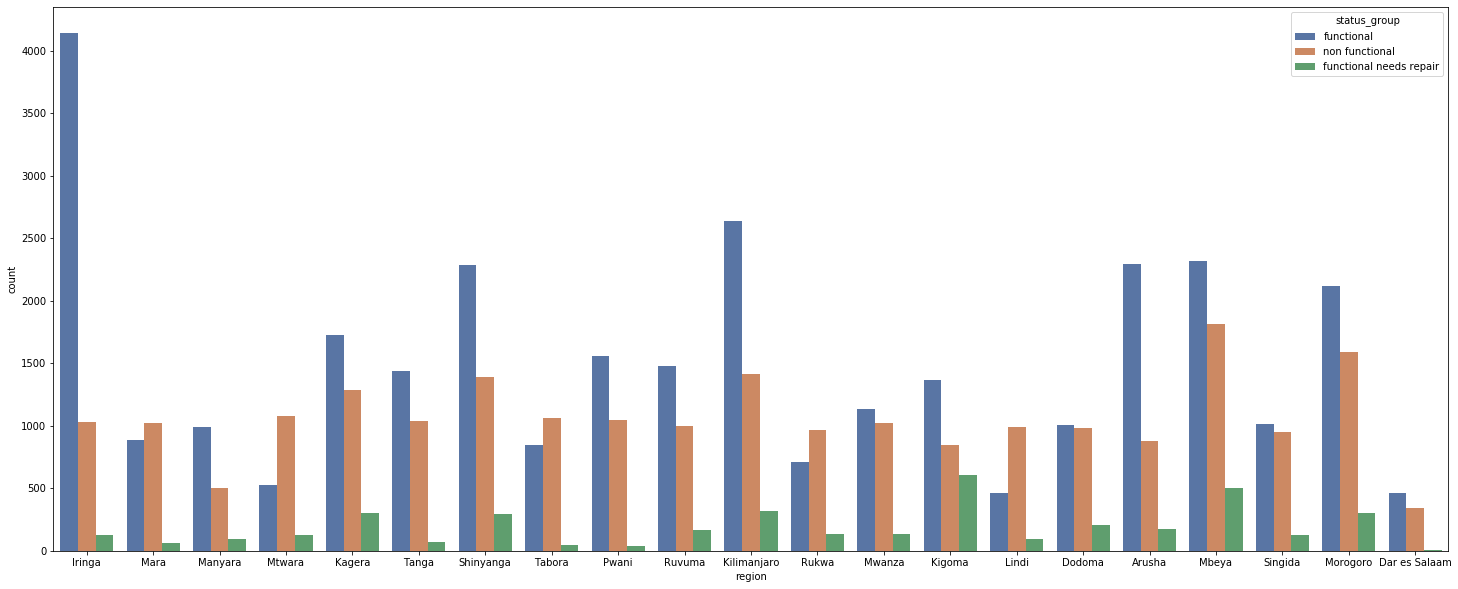

In [30]:
#looking at regions to find the most critical ones
plt.figure(figsize=(25, 10))
sns.countplot(data=data,x='region',hue='status_group', palette = 'deep') #(deep, muted, bright, pastel, dark, colorblind)
plt.show()

In [31]:
data[['construction_year', 'date_recorded']].head(7)

,construction_year,date_recorded
0,1999,2011-03-14
1,2010,2013-03-06
2,2009,2013-02-25
3,1986,2013-01-28
4,0,2011-07-13
5,2009,2011-03-13
6,0,2012-10-01


In [32]:
data.construction_year.value_counts().head(5)

0       18897
2010     2645
2008     2613
2009     2533
2000     2091
Name: construction_year, dtype: int64

In [33]:
data['construction_year'].replace(0.0, np.nan, inplace=True)

In [34]:
data[['construction_year', 'date_recorded']].head(7)

,construction_year,date_recorded
0,1999.0,2011-03-14
1,2010.0,2013-03-06
2,2009.0,2013-02-25
3,1986.0,2013-01-28
4,NaN,2011-07-13
5,2009.0,2011-03-13
6,NaN,2012-10-01


In [35]:
data["construction_year"].fillna(data.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['region'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data["construction_year"].median(), inplace=True)
data["construction_year"] = data["construction_year"].astype('int')

In [36]:
data[['construction_year', 'date_recorded']].head(7)

,construction_year,date_recorded
0,1999,2011-03-14
1,2010,2013-03-06
2,2009,2013-02-25
3,1986,2013-01-28
4,2000,2011-07-13
5,2009,2011-03-13
6,2005,2012-10-01


In [37]:
data['date_recorded'] = pd.to_datetime(data['date_recorded'])
data['operational_year'] = (data.date_recorded.dt.year - data.construction_year).astype('int')

In [38]:
data.head(7)

,date_recorded,construction_year,gps_height,longitude,latitude,basin,region,district_code,population,extraction_type_class,quantity,source_type,waterpoint_type,payment,status_group,operational_year
0,2011-03-14,1999,1390,34.938093,-9.856322,Lake Nyasa,Iringa,5,109,gravity,enough,spring,communal standpipe,pay annually,functional,12
1,2013-03-06,2010,1399,34.698766,-2.147466,Lake Victoria,Mara,2,280,gravity,insufficient,rainwater harvesting,communal standpipe,never pay,functional,3
2,2013-02-25,2009,686,37.460664,-3.821329,Pangani,Manyara,4,250,gravity,enough,dam,communal standpipe multiple,pay per bucket,functional,4
3,2013-01-28,1986,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,58,submersible,dry,borehole,communal standpipe multiple,never pay,non functional,27
4,2011-07-13,2000,0,31.130847,-1.825359,Lake Victoria,Kagera,1,0,gravity,seasonal,rainwater harvesting,communal standpipe,never pay,functional,11
5,2011-03-13,2009,0,39.172796,-4.765587,Pangani,Tanga,8,1,submersible,enough,other,communal standpipe multiple,pay per bucket,functional,2
6,2012-10-01,2005,0,33.362410,-3.766365,Internal,Shinyanga,3,0,handpump,enough,borehole,hand pump,never pay,non functional,7


In [39]:
data = data[data['operational_year']>=0]

In [40]:
data.shape

(57575, 16)

In [41]:
#Multi-plot grid for plotting conditional relationships;
#The basic workflow is to initialize the FacetGrid object with the dataset and the variables that are used to structure the grid.
#Then one or more plotting functions can be applied to each subset by calling FacetGrid.map()


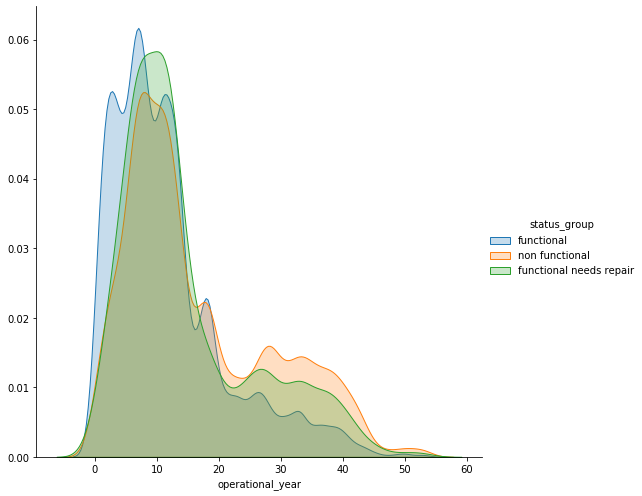

In [42]:
sns.FacetGrid(data,hue='status_group',size=7).map(sns.kdeplot, 'operational_year', shade=True).add_legend()
plt.show()

Numeric variables

In [43]:
data.head()

,date_recorded,construction_year,gps_height,longitude,latitude,basin,region,district_code,population,extraction_type_class,quantity,source_type,waterpoint_type,payment,status_group,operational_year
0,2011-03-14,1999,1390,34.938093,-9.856322,Lake Nyasa,Iringa,5,109,gravity,enough,spring,communal standpipe,pay annually,functional,12
1,2013-03-06,2010,1399,34.698766,-2.147466,Lake Victoria,Mara,2,280,gravity,insufficient,rainwater harvesting,communal standpipe,never pay,functional,3
2,2013-02-25,2009,686,37.460664,-3.821329,Pangani,Manyara,4,250,gravity,enough,dam,communal standpipe multiple,pay per bucket,functional,4
3,2013-01-28,1986,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,58,submersible,dry,borehole,communal standpipe multiple,never pay,non functional,27
4,2011-07-13,2000,0,31.130847,-1.825359,Lake Victoria,Kagera,1,0,gravity,seasonal,rainwater harvesting,communal standpipe,never pay,functional,11


In [44]:
#Надморска височина на кладенеца
data['gps_height'].replace(0.0, np.nan, inplace=True)

In [45]:
data["gps_height"].fillna(data.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data["gps_height"].mean(), inplace=True)

In [46]:
data['population'].replace(0.0, np.nan, inplace=True)

In [47]:
data["population"].fillna(data.groupby(['region', 'district_code'])["population"].transform("mean"), inplace=True)
data["population"].fillna(data.groupby(['region'])["population"].transform("mean"), inplace=True)
data["population"].fillna(data["population"].mean(), inplace=True)

In [48]:
data

,date_recorded,construction_year,gps_height,longitude,latitude,basin,region,district_code,population,extraction_type_class,quantity,source_type,waterpoint_type,payment,status_group,operational_year
0,2011-03-14,1999,1390.000000,34.938093,-9.856322,Lake Nyasa,Iringa,5,109.000000,gravity,enough,spring,communal standpipe,pay annually,functional,12
1,2013-03-06,2010,1399.000000,34.698766,-2.147466,Lake Victoria,Mara,2,280.000000,gravity,insufficient,rainwater harvesting,communal standpipe,never pay,functional,3
2,2013-02-25,2009,686.000000,37.460664,-3.821329,Pangani,Manyara,4,250.000000,gravity,enough,dam,communal standpipe multiple,pay per bucket,functional,4
3,2013-01-28,1986,263.000000,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,58.000000,submersible,dry,borehole,communal standpipe multiple,never pay,non functional,27
4,2011-07-13,2000,1048.536441,31.130847,-1.825359,Lake Victoria,Kagera,1,310.267379,gravity,seasonal,rainwater harvesting,communal standpipe,never pay,functional,11
5,2011-03-13,2009,676.441100,39.172796,-4.765587,Pangani,Tanga,8,1.000000,submersible,enough,other,communal standpipe multiple,pay per bucket,functional,2
6,2012-10-01,2005,1350.981707,33.362410,-3.766365,Internal,Shinyanga,3,428.359756,handpump,enough,borehole,hand pump,never pay,non functional,7
7,2012-10-09,2005,1350.981707,32.620617,-4.226198,Lake Tanganyika,Shinyanga,3,428.359756,handpump,enough,shallow well,hand pump,unknown,non functional,7
8,2012-11-03,2005,1048.536441,32.711100,-5.146712,Lake Tanganyika,Tabora,6,310.267379,handpump,seasonal,borehole,hand pump,never pay,non functional,7
9,2011-08-03,2000,1048.536441,30.626991,-1.257051,Lake Victoria,Kagera,1,310.267379,handpump,enough,shallow well,hand pump,never pay,functional,11


## 4. Prepare the Data for Machine Learning Algorithms

In [49]:
algo_columns = ["gps_height","longitude","latitude","basin", "region","population",
"extraction_type_class","quantity","source_type", "waterpoint_type","payment", "operational_year","status_group"]

In [50]:
df = data[algo_columns]

In [51]:
df.head()

,gps_height,longitude,latitude,basin,region,population,extraction_type_class,quantity,source_type,waterpoint_type,payment,operational_year,status_group
0,1390.000000,34.938093,-9.856322,Lake Nyasa,Iringa,109.000000,gravity,enough,spring,communal standpipe,pay annually,12,functional
1,1399.000000,34.698766,-2.147466,Lake Victoria,Mara,280.000000,gravity,insufficient,rainwater harvesting,communal standpipe,never pay,3,functional
2,686.000000,37.460664,-3.821329,Pangani,Manyara,250.000000,gravity,enough,dam,communal standpipe multiple,pay per bucket,4,functional
3,263.000000,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58.000000,submersible,dry,borehole,communal standpipe multiple,never pay,27,non functional
4,1048.536441,31.130847,-1.825359,Lake Victoria,Kagera,310.267379,gravity,seasonal,rainwater harvesting,communal standpipe,never pay,11,functional


In [52]:
df.shape

(57575, 13)

In [53]:
#Encode target labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Status_group'] = le.fit_transform(df['status_group'])

In [54]:
df.head()

,gps_height,longitude,latitude,basin,region,population,extraction_type_class,quantity,source_type,waterpoint_type,payment,operational_year,status_group,Status_group
0,1390.000000,34.938093,-9.856322,Lake Nyasa,Iringa,109.000000,gravity,enough,spring,communal standpipe,pay annually,12,functional,0
1,1399.000000,34.698766,-2.147466,Lake Victoria,Mara,280.000000,gravity,insufficient,rainwater harvesting,communal standpipe,never pay,3,functional,0
2,686.000000,37.460664,-3.821329,Pangani,Manyara,250.000000,gravity,enough,dam,communal standpipe multiple,pay per bucket,4,functional,0
3,263.000000,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58.000000,submersible,dry,borehole,communal standpipe multiple,never pay,27,non functional,2
4,1048.536441,31.130847,-1.825359,Lake Victoria,Kagera,310.267379,gravity,seasonal,rainwater harvesting,communal standpipe,never pay,11,functional,0


Transform categorical features to numeric

In [55]:
df['Basin'] = pd.factorize(df.basin.values)[0]
df['Region'] = pd.factorize(df.region.values)[0]
df['Extraction_type_class'] = pd.factorize(df.extraction_type_class.values)[0]
df['Quantity'] = pd.factorize(df.quantity.values)[0]
df['Source_type'] = pd.factorize(df.source_type.values)[0]
df['Waterpoint_type'] = pd.factorize(df.waterpoint_type.values)[0]
df['Payment'] = pd.factorize(df.payment.values)[0]

In [56]:
df.head()

,gps_height,longitude,latitude,basin,region,population,extraction_type_class,quantity,source_type,waterpoint_type,payment,operational_year,status_group,Status_group,Basin,Region,Extraction_type_class,Quantity,Source_type,Waterpoint_type,Payment
0,1390.000000,34.938093,-9.856322,Lake Nyasa,Iringa,109.000000,gravity,enough,spring,communal standpipe,pay annually,12,functional,0,0,0,0,0,0,0,0
1,1399.000000,34.698766,-2.147466,Lake Victoria,Mara,280.000000,gravity,insufficient,rainwater harvesting,communal standpipe,never pay,3,functional,0,1,1,0,1,1,0,1
2,686.000000,37.460664,-3.821329,Pangani,Manyara,250.000000,gravity,enough,dam,communal standpipe multiple,pay per bucket,4,functional,0,2,2,0,0,2,1,2
3,263.000000,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58.000000,submersible,dry,borehole,communal standpipe multiple,never pay,27,non functional,2,3,3,1,2,3,1,1
4,1048.536441,31.130847,-1.825359,Lake Victoria,Kagera,310.267379,gravity,seasonal,rainwater harvesting,communal standpipe,never pay,11,functional,0,1,4,0,3,1,0,1


In [57]:
column_values = df[["status_group", "Status_group"]].values.ravel()
unique_values = pd.unique(column_values)
print(unique_values)

['functional' 0 'non functional' 2 'functional needs repair' 1]


In [58]:
df = df.drop(columns=['basin','region','payment', 'extraction_type_class','quantity','source_type','waterpoint_type','status_group'])

In [59]:
df.head()

,gps_height,longitude,latitude,population,operational_year,Status_group,Basin,Region,Extraction_type_class,Quantity,Source_type,Waterpoint_type,Payment
0,1390.000000,34.938093,-9.856322,109.000000,12,0,0,0,0,0,0,0,0
1,1399.000000,34.698766,-2.147466,280.000000,3,0,1,1,0,1,1,0,1
2,686.000000,37.460664,-3.821329,250.000000,4,0,2,2,0,0,2,1,2
3,263.000000,38.486161,-11.155298,58.000000,27,2,3,3,1,2,3,1,1
4,1048.536441,31.130847,-1.825359,310.267379,11,0,1,4,0,3,1,0,1


In [60]:
y = df.pop('Status_group')

In [61]:
X = df

In [62]:
X.head()

,gps_height,longitude,latitude,population,operational_year,Basin,Region,Extraction_type_class,Quantity,Source_type,Waterpoint_type,Payment
0,1390.000000,34.938093,-9.856322,109.000000,12,0,0,0,0,0,0,0
1,1399.000000,34.698766,-2.147466,280.000000,3,1,1,0,1,1,0,1
2,686.000000,37.460664,-3.821329,250.000000,4,2,2,0,0,2,1,2
3,263.000000,38.486161,-11.155298,58.000000,27,3,3,1,2,3,1,1
4,1048.536441,31.130847,-1.825359,310.267379,11,1,4,0,3,1,0,1


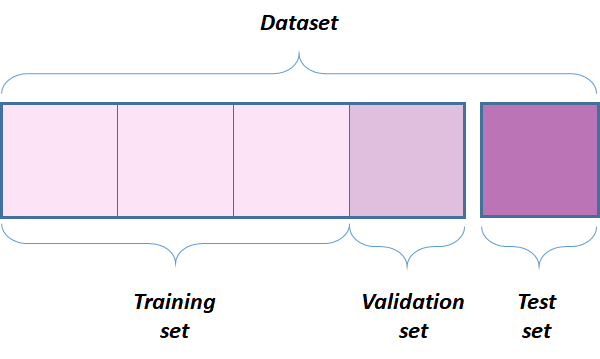

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## 5. Select a model and train it.

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
model_dt = dt.fit(X_train, y_train)

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000,min_samples_split=10,criterion='gini',random_state=0)
model_rf = rf.fit(X_train, y_train)

In [66]:
# the predicted class for each sample in X is returned
prediction_dt = model_dt.predict(X_test)
prediction_rf = model_rf.predict(X_test)

In [67]:
prediction_df = pd.DataFrame({'dt_predicted': prediction_dt, 'rf_predicted': prediction_rf, 'label': y_test})

In [68]:
prediction_df.head()

,dt_predicted,rf_predicted,label
56432,2,2,2
2816,0,0,0
45282,0,0,0
29059,0,0,0
55817,1,0,0


In [69]:
print("Decision Tree Accuracy")
model_dt.score(X_test,y_test)

Decision Tree Accuracy


0.7483934464192671

In [70]:
print("Random Forest Accuracy")
model_rf.score(X_test,y_test)

Random Forest Accuracy


0.8081977652984427

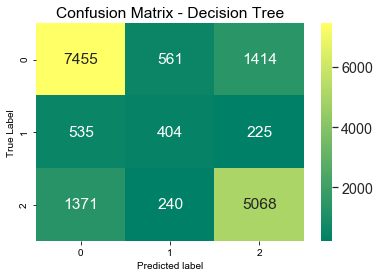

<Figure size 720x504 with 0 Axes>

In [71]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, prediction_dt)

matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="summer")

#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =10)
ax.set_ylabel("True Label", fontsize=10)
plt.show()

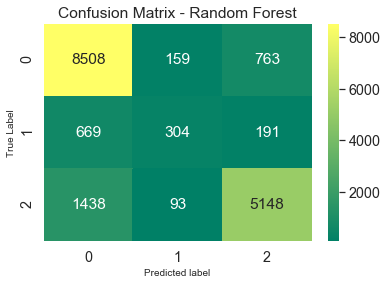

<Figure size 720x504 with 0 Axes>

In [72]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            prediction_rf)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="summer")

#set axis titles
ax.set_title('Confusion Matrix - Random Forest')
ax.set_xlabel("Predicted label", fontsize =10)
ax.set_ylabel("True Label", fontsize=10)
plt.show()

In [73]:
print("Decision Tree")
print(metrics.classification_report(y_test,prediction_dt))
print("Random Forest")
print(metrics.classification_report(y_test,prediction_rf))

Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      9430
           1       0.34      0.35      0.34      1164
           2       0.76      0.76      0.76      6679

    accuracy                           0.75     17273
   macro avg       0.63      0.63      0.63     17273
weighted avg       0.75      0.75      0.75     17273

Random Forest
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      9430
           1       0.55      0.26      0.35      1164
           2       0.84      0.77      0.81      6679

    accuracy                           0.81     17273
   macro avg       0.73      0.64      0.67     17273
weighted avg       0.80      0.81      0.80     17273



Bonus

In [74]:
import geopandas

In [75]:
maps = geopandas.read_file("Demo/tn398yw9512.shp")
gdf = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.longitude, data.latitude))

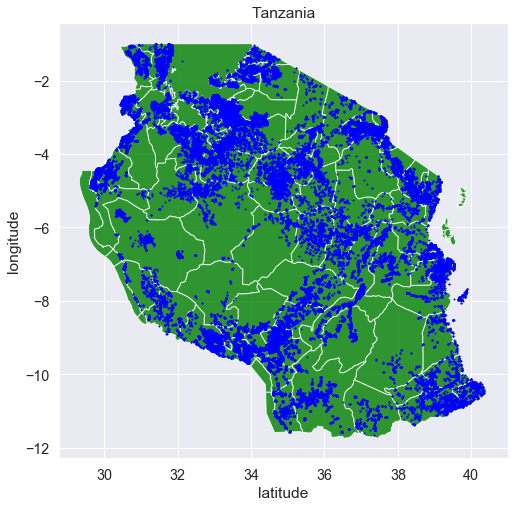

In [76]:
fig, ax = plt.subplots(figsize=(15,8))
maps.plot(ax=ax, color='green',alpha=0.8)
gdf.plot(ax=ax, color='blue',alpha = 0.9, markersize=1)
plt.title("Tanzania")
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()